<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/MHC2024008_RNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1
Step 1:Load the dataset

In [ ]:
import pandas as pd


In [ ]:

!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz


!tar -xvzf aclImdb_v1.tar.gz


Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import os
import pandas as pd

def load_imdb_data(data_dir):
    data = {"review": [], "sentiment": []}

    for label in ["pos", "neg"]:
        path = os.path.join(data_dir, label)
        for filename in os.listdir(path):
            with open(os.path.join(path, filename), encoding='utf-8') as file:
                data["review"].append(file.read())
                data["sentiment"].append(1 if label == "pos" else 0)

    return pd.DataFrame(data)


train_df = load_imdb_data("aclImdb/train")
test_df = load_imdb_data("aclImdb/test")


df = pd.concat([train_df, test_df], ignore_index=True)

print(df.head())


                                              review  sentiment
0  A typical Clausen film, but then again not typ...          1
1  Watching David&Bathsheba is a much better way ...          1
2  Shakespeare Behind Bars was the most surprisin...          1
3  Oliver! the musical is a favorite of mine. The...          1
4  Or at least one of the best. I think this is a...          1


Step 2:Clean and Process the text


In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    return tokens

df['tokens'] = df['review'].apply(clean_text)
df[['review', 'tokens', 'sentiment']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,tokens,sentiment
0,"A typical Clausen film, but then again not typ...","[a, typical, clausen, film, but, then, again, ...",1
1,Watching David&Bathsheba is a much better way ...,"[watching, davidbathsheba, is, a, much, better...",1
2,Shakespeare Behind Bars was the most surprisin...,"[shakespeare, behind, bars, was, the, most, su...",1
3,Oliver! the musical is a favorite of mine. The...,"[oliver, the, musical, is, a, favorite, of, mi...",1
4,Or at least one of the best. I think this is a...,"[or, at, least, one, of, the, best, i, think, ...",1


Step 3:Building an RNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 64
maxlen = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['tokens'].astype(str).tolist())
sequences = tokenizer.texts_to_sequences(df['tokens'].astype(str).tolist())
X = pad_sequences(sequences, maxlen=maxlen)
y = df['sentiment'].values



In [ ]:

def build_and_train_model(epochs):


    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X, y, epochs=epochs, batch_size=64, validation_split=0.2)
    return model, history


In [ ]:
print("Output for 10 epochs")
model_10, history_10 = build_and_train_model(10)
print("Output for 30 epochs")
model_30, history_30 = build_and_train_model(30)
print("Output for 50 epochs")
model_50, history_50= build_and_train_model(50)


Output for 10 epochs
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6778 - loss: 0.5977 - val_accuracy: 0.6901 - val_loss: 0.6313
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8597 - loss: 0.3370 - val_accuracy: 0.5603 - val_loss: 0.8092
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9026 - loss: 0.2490 - val_accuracy: 0.7602 - val_loss: 0.5814
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9495 - loss: 0.1447 - val_accuracy: 0.7348 - val_loss: 0.7547
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9681 - loss: 0.0932 - val_accuracy: 0.7432 - val_loss: 0.8065
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9818 - loss: 0.0545 - val_accuracy: 0.7380 - val_loss: 1.1299
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9758 - loss: 0.0679 - val_accuracy: 0.7340 - val_loss: 0.9960
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9826 - loss: 0.0505 - val_accurac

Step 4:Evaluation and Analysis

In [ ]:
test_df['tokens'] = test_df['review'].apply(clean_text) # Add this line to create 'tokens' column in test_df
test_sequences = tokenizer.texts_to_sequences(test_df['tokens'].astype(str).tolist())
X_test = pad_sequences(test_sequences, maxlen=maxlen)
y_test = test_df['sentiment'].values

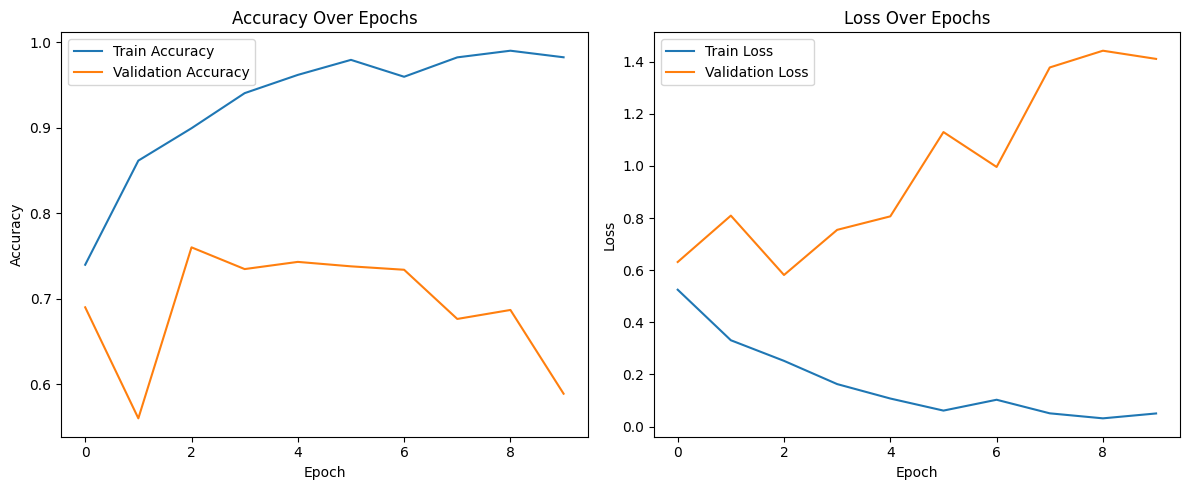

In [ ]:
import matplotlib.pyplot as plt


def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_10)


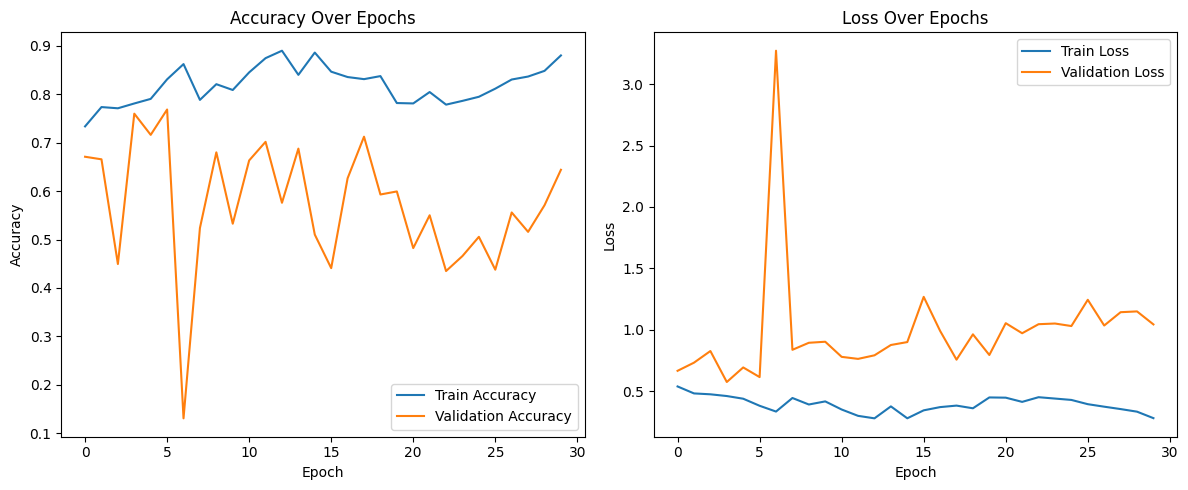

In [ ]:
plot_training_history(history_30)

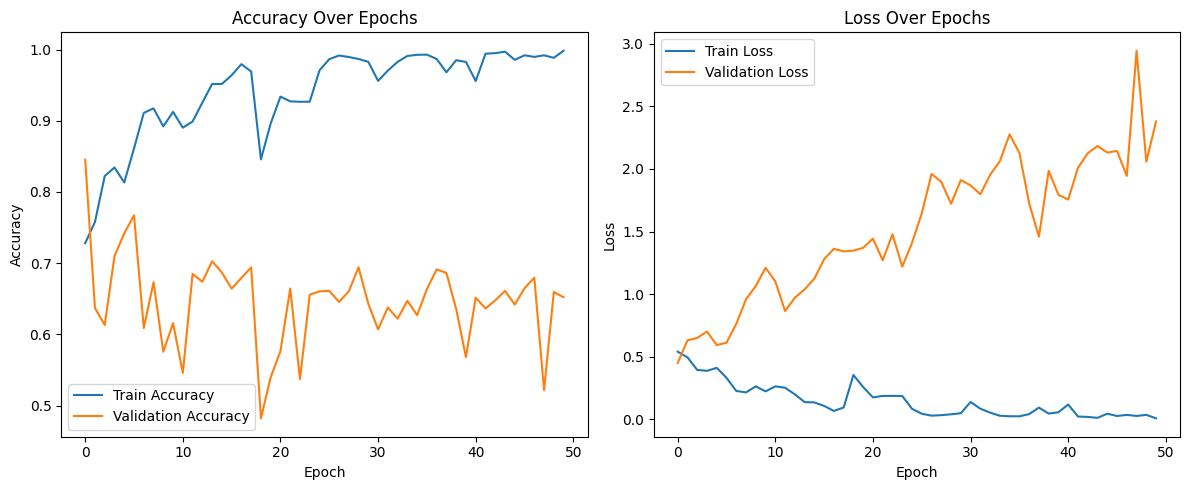

In [ ]:
plot_training_history(history_50)

Comparative Analysis with LSTM and GRU

LSTM


In [ ]:
from tensorflow.keras.layers import LSTM

def build_and_train_lstm_model(X, y, epochs):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, batch_size=64, validation_split=0.2)
    return model, history


GRU


In [ ]:
from tensorflow.keras.layers import GRU
def build_and_train_gru_model(X, y, epochs):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
        GRU(64),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, batch_size=64, validation_split=0.2)
    return model, history


In [ ]:
model_lstm, history_lstm = build_and_train_lstm_model(X, y, epochs=10)
model_gru, history_gru = build_and_train_gru_model(X, y, epochs=10)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7549 - loss: 0.4923 - val_accuracy: 0.8883 - val_loss: 0.2668
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9003 - loss: 0.2558 - val_accuracy: 0.8322 - val_loss: 0.3771
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9223 - loss: 0.1989 - val_accuracy: 0.8376 - val_loss: 0.4200
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9439 - loss: 0.1495 - val_accuracy: 0.8792 - val_loss: 0.2932
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9567 - loss: 0.1197 - val_accuracy: 0.7240 - val_loss: 0.7525
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9641 - loss: 0.0991 - val_accuracy: 0.8435 - val_loss: 0.5464
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9721 - loss: 0.0767 - val_accuracy: 0.8223 - val_loss: 0.6311
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9794 - loss: 0.0625 - val_accuracy: 0

Visualize and interpret results using graphs.


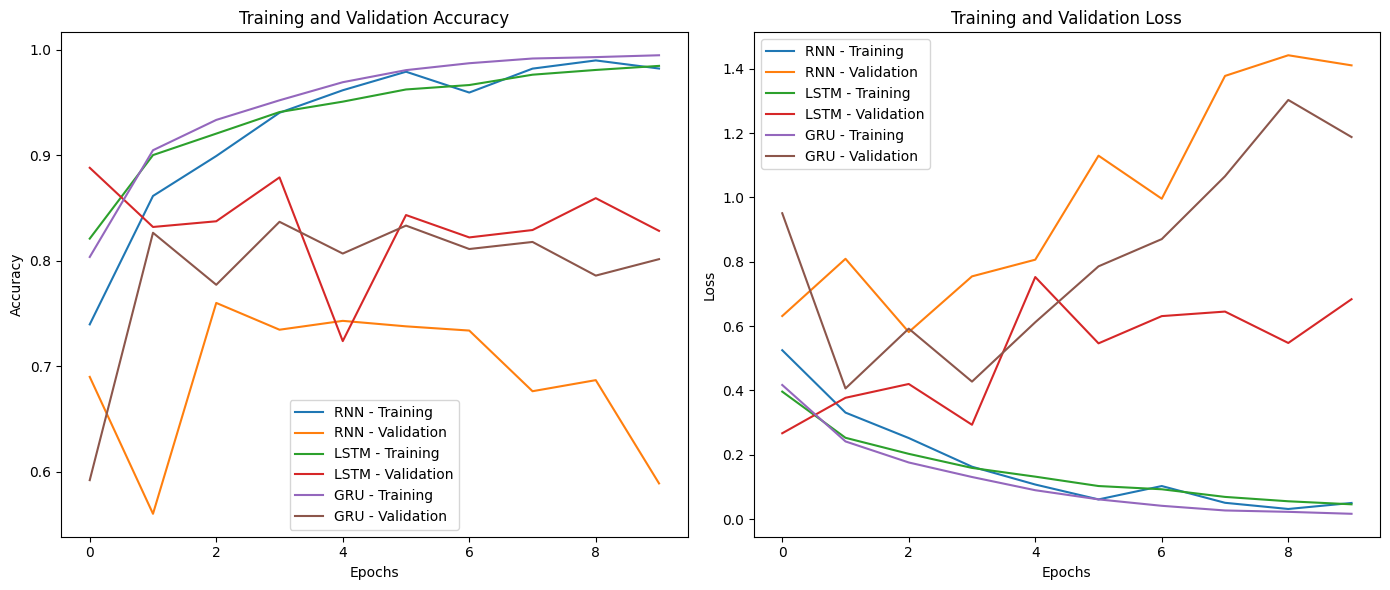

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history_rnn, history_lstm, history_gru, model_names=['RNN', 'LSTM', 'GRU']):
    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history_rnn.history['accuracy'], label=f'{model_names[0]} - Training')
    plt.plot(history_rnn.history['val_accuracy'], label=f'{model_names[0]} - Validation')
    plt.plot(history_lstm.history['accuracy'], label=f'{model_names[1]} - Training')
    plt.plot(history_lstm.history['val_accuracy'], label=f'{model_names[1]} - Validation')
    plt.plot(history_gru.history['accuracy'], label=f'{model_names[2]} - Training')
    plt.plot(history_gru.history['val_accuracy'], label=f'{model_names[2]} - Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history_rnn.history['loss'], label=f'{model_names[0]} - Training')
    plt.plot(history_rnn.history['val_loss'], label=f'{model_names[0]} - Validation')
    plt.plot(history_lstm.history['loss'], label=f'{model_names[1]} - Training')
    plt.plot(history_lstm.history['val_loss'], label=f'{model_names[1]} - Validation')
    plt.plot(history_gru.history['loss'], label=f'{model_names[2]} - Training')
    plt.plot(history_gru.history['val_loss'], label=f'{model_names[2]} - Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history_10, history_lstm, history_gru)


Findings and Suggestions:

(1) RNN
Use when: Sequences are short, need speed, or just a simple baseline.

Avoid when: Sequences are long or context is complex.

(2) LSTM
Use when: Need to remember long-term context, high accuracy/stability.

Avoid when: Limited resources or training time.

(3) GRU
Use when: Want LSTM-like performance with faster training.

Avoid when: Interpretability matters or LSTM performs significantly better.

For Better Results we can do following:
(1) Use Bidirectional LSTM/GRU for context from both directions.

(2) Add Attention for improved focus on key parts of input.

(3) Try pretrained embeddings (GloVe, Word2Vec).

(4) Apply Dropout to reduce overfitting.